# Decision Tree Modelling
In our Linear Regression notebook, the best model we obtained suffered from high bias. A careful inspection of its residual plot and prediction error plot shows that most of model's error were encountered when the predicted value exceeds the $\$2000.00$ mark. The explained variance score and $R^2$ of our model tells us that only explained 56% of the variance of the premium charges can be explained by our linear model. In this notebook, we will model the US Health Insurance Dataset using decision trees and see if this non-parametric model will perform better than linear regression.

In [1]:
import numpy as np
import pandas as pd
from sklearn import set_config

set_config(transform_output = "pandas")

In [2]:
DATASET_URI = "dataset/insurance.csv"
df0 = pd.read_csv(DATASET_URI)

df0.sample(n=10)

,age,sex,bmi,children,smoker,region,charges
1291,19,male,34.900,0,yes,southwest,34828.65400
1190,31,female,32.775,2,no,northwest,5327.40025
655,52,female,25.300,2,yes,southeast,24667.41900
462,62,female,38.095,2,no,northeast,15230.32405
456,55,female,30.140,2,no,southeast,11881.96960
559,19,male,35.530,0,no,northwest,1646.42970
405,52,female,38.380,2,no,northeast,11396.90020
1032,30,female,27.930,0,no,northeast,4137.52270
176,38,male,27.835,2,no,northwest,6455.86265
744,50,male,26.410,0,no,northwest,8827.20990


## Split the Dataset

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into feature matrix and target vector
X = df0.iloc[:, :-1]
y = df0.iloc[:, -1]

# Split the data into training, testing set, and evaluation set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.2)
X_test, X_eval, y_test, y_eval = train_test_split(X, y, random_state=22, test_size=0.5)

## Build the ML Pipeline

In [4]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Define the ML pipeline
ml_pipeline = make_pipeline(
    # Conduct feature matrix preprocessing
    ColumnTransformer(
        [
            ("passthrough", "passthrough", ["age", "bmi", "children"]),
            ("onehotencoder", OneHotEncoder(sparse_output=False, drop="first"), ["sex", "smoker", "region"])
        ]
    ),
    
    # Conduct target vector preprocessing then regression modelling
    TransformedTargetRegressor(
        regressor=DecisionTreeRegressor(),
        func=np.log,
        inverse_func=np.exp
    )
)

## Cross Validation

In [5]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

from warnings import filterwarnings
filterwarnings(action="ignore", category=UserWarning)

grid_searcher = GridSearchCV(
    estimator=ml_pipeline,
    param_grid= {
        'transformedtargetregressor__regressor__max_depth'        : [None, 5, 6, 7, 8],
        'transformedtargetregressor__regressor__min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10],
        'transformedtargetregressor__regressor__min_samples_split': [2, 3, 4, 5, 6, 7 ,8, 9, 10],
        'transformedtargetregressor__regressor__splitter': ['best', 'random'],
    },
    cv=ShuffleSplit(n_splits=10, test_size=0.22, random_state=22)
)

grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=22, test_size=0.22, train_size=None),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('transformedtargetregressor',
                                        Tr...
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=DecisionTreeRegressor()))]),
             param_grid={'transformedtargetregressor__regressor__max_depth': [None,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                         'transformedtargetregressor__regressor__min_samples_leaf': [1,
                                                                                     2,
                                                                                     3,
                                                                                     4,
                                                                                     5,
                                                                                     6,
                                                                                     7,
                                                                                     8,
                                                                                     9,
                                                                                     10],
                         'transformedtargetregressor__regressor__min_samples_split': [2,
                                                                                      3,
                                                                                      4,
                                                                                      5,
                                                                                      6,
                                                                                      7,
                                                                                      8,
                                                                                      9,
                                                                                      10],
                         'transformedtargetregressor__regressor__splitter': ['best',
                                                                             'random']})

### Grid Search ResultS

In [6]:
pd.DataFrame(grid_searcher.cv_results_).sort_values(by=["rank_test_score"]).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformedtargetregressor__regressor__max_depth,param_transformedtargetregressor__regressor__min_samples_leaf,param_transformedtargetregressor__regressor__min_samples_split,param_transformedtargetregressor__regressor__splitter,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
338,0.010655,0.000552,0.006556,0.000573,5,9,9,best,{'transformedtargetregressor__regressor__max_d...,0.856184,...,0.844033,0.912143,0.865046,0.824684,0.871982,0.84111,0.897493,0.861514,0.026109,1
336,0.013605,0.001687,0.007759,0.001153,5,9,8,best,{'transformedtargetregressor__regressor__max_d...,0.856184,...,0.844033,0.912143,0.865046,0.824684,0.871982,0.84111,0.897493,0.861514,0.026109,1
334,0.019463,0.007147,0.014405,0.009135,5,9,7,best,{'transformedtargetregressor__regressor__max_d...,0.856184,...,0.844033,0.912143,0.865046,0.824684,0.871982,0.84111,0.897493,0.861514,0.026109,1
330,0.015986,0.009105,0.008154,0.003603,5,9,5,best,{'transformedtargetregressor__regressor__max_d...,0.856184,...,0.844033,0.912143,0.865046,0.824684,0.871982,0.84111,0.897493,0.861514,0.026109,1
340,0.011839,0.000761,0.007100,0.000831,5,9,10,best,{'transformedtargetregressor__regressor__max_d...,0.856184,...,0.844033,0.912143,0.865046,0.824684,0.871982,0.84111,0.897493,0.861514,0.026109,1


### Best Hyperparameters

In [7]:
pd.Series(
    data=grid_searcher.best_params_.values(),
    index=grid_searcher.best_params_.keys()
)

transformedtargetregressor__regressor__max_depth               5
transformedtargetregressor__regressor__min_samples_leaf        9
transformedtargetregressor__regressor__min_samples_split       3
transformedtargetregressor__regressor__splitter             best
dtype: object

### Best Model

In [8]:
best_model = grid_searcher.best_estimator_
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=DecisionTreeRegressor(max_depth=5,
                                                                            min_samples_leaf=9,
                                                                            min_samples_split=3)))])

## Feature Importance

In [9]:
feature_importance = pd.Series(
    data=best_model.named_steps['transformedtargetregressor'].regressor_.feature_importances_,
    index=best_model.named_steps['transformedtargetregressor'].feature_names_in_
).sort_values(ascending=False)

feature_importance

onehotencoder__smoker_yes          0.523614
passthrough__age                   0.382630
passthrough__children              0.047451
passthrough__bmi                   0.039595
onehotencoder__sex_male            0.004773
onehotencoder__region_southwest    0.001906
onehotencoder__region_southeast    0.000031
onehotencoder__region_northwest    0.000000
dtype: float64

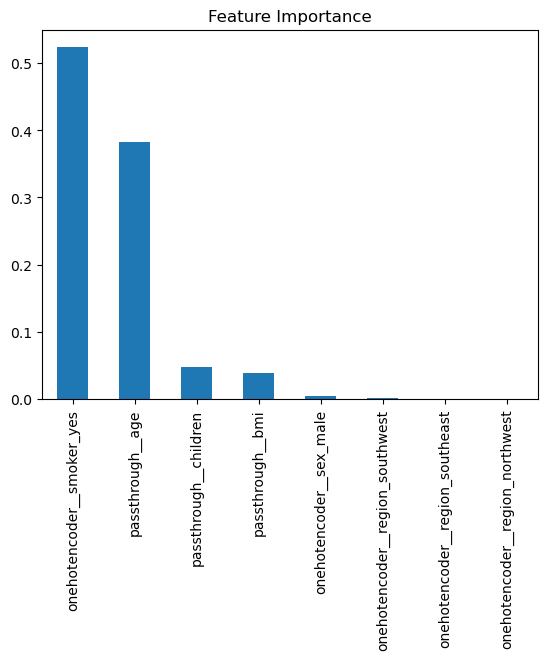

In [10]:
feature_importance.plot(kind="bar", title="Feature Importance");

## Residuals

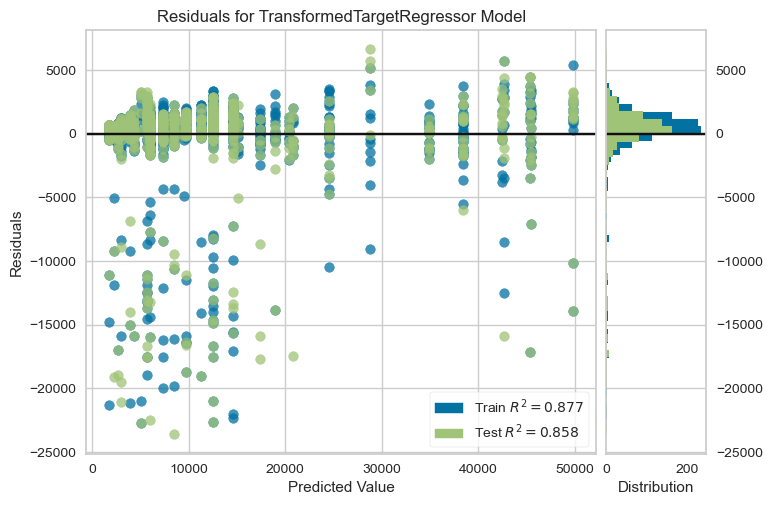

In [11]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

residuals_plot = ResidualsPlot(estimator=best_model)
residuals_plot.fit(X_train, y_train)
residuals_plot.score(X_eval, y_eval)
residuals_plot.show();

## Prediction Error

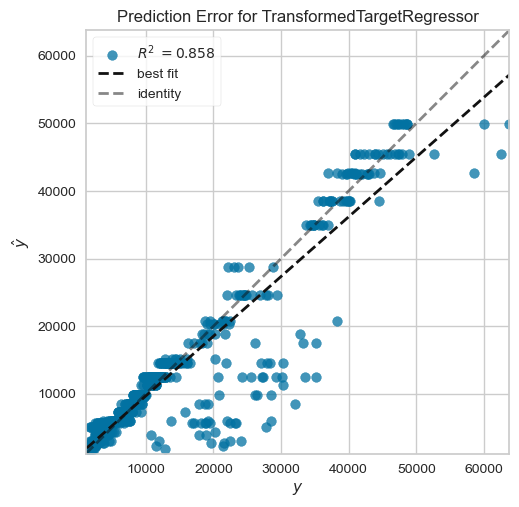

In [12]:
prediction_error_plot = PredictionError(estimator=best_model)
prediction_error_plot.fit(X_train, y_train)
prediction_error_plot.score(X_eval, y_eval)
prediction_error_plot.show();

## Model Evaluation

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate predictions using the training and evaluation data
y_train_pred = best_model.predict(X_train)
y_eval_pred = best_model.predict(X_eval)

# Calculate the metrics
metric_names = [metric.__name__ for metric in [mean_absolute_error, mean_squared_error, r2_score]]
training_metric_values = [metric(y_train, y_train_pred) for metric in [mean_absolute_error, mean_squared_error, r2_score]]
eval_metric_values = [metric(y_eval, y_eval_pred) for metric in [mean_absolute_error, mean_squared_error, r2_score]]

# Present the metrics in a dataframe
model_metrics_summary = pd.DataFrame({
    "Training Score": training_metric_values,
    "Cross-validation Score": eval_metric_values,
}, index=metric_names)

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
model_metrics_summary["Score Difference"] = model_metrics_summary["Cross-validation Score"] - model_metrics_summary["Training Score"]
model_metrics_summary

,Training Score,Cross-validation Score,Score Difference
mean_absolute_error,"2,015.53","2,234.00",218.47
mean_squared_error,"17,958,121.78","22,291,583.45","4,333,461.67"
r2_score,0.88,0.86,-0.02


## Tree Visualization

C:\Users\John Rey Faciolan\AppData\Local\Temp\ipykernel_24476\529569977.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


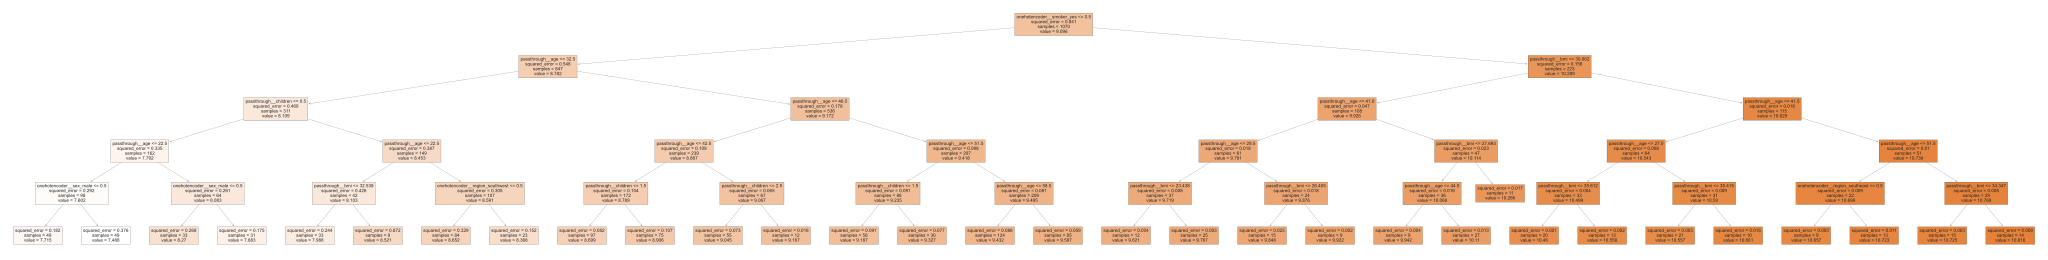

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

plt.figure().set_size_inches(80, 10)

plot_tree(
    decision_tree=best_model.named_steps['transformedtargetregressor'].regressor_,
    feature_names=best_model[:-1].get_feature_names_out(),
    fontsize=10,
    filled=True
);

## Conclusion
In this notebook, we performed machine learning modelling to the US Health Insurance dataset using Decision Tree algorithm. We used grid search cross validation and found that the optimal depth of the tree was 5, with minumum samples of per leaf of 9 and minimum samples to split of 3. Based on the results of this model, the top features affecting the premium charges were `smoker`, `age`, `children`, and `bmi`. Based on the feature importance of the generated decision tree model, `sex`, and `region` have the least amount of feature importance.

The generated decision tree model's residual plot shows a normally distributed data centered at zero, but still contains long tails on the negative spectrum. The prediction error plot shows a more linear relationship between the predicted values and the actual values.

In terms of variance, the generated decision tree model has an $R^2$ of $0.86$. This means that our model explains 86% of the variance of our data. In terms mean absolute error, the values of the mean absolute error on training and testing data were at $\$2,015.53$ and $\$2,234.00$, respectively. The difference of their scores were only $\$218.47$. This means that our model has little variance problem. However, since the model's prediction on the training and testing data were off by $\$2000.00$ the model still suffers from bias problem.

The generated decision tree plot of the model shows that deciding factor of premium charges for non-smokers was age and number of children. The higher the age, the higher the premium charge. In the case of smokers, the main deciding factor for premium charge were bmi and age. The higher both of these values are, the high was the premium charge.


All in all, our decision tree model performs much better than its linear regression counterpart. Aside from performance, the generated decision tree plot enables us to interpret how the model predicts premium charge using all of the features of our dataset.